In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install canaro caer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 13.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 82.7 MB/s eta 0:00:00:00:010:01


In [3]:
import os
import numpy as np
import cv2 as cv
import canaro
import caer
import gc

2025-06-13 09:20:40.314514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749806440.512755      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749806440.567692      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'

In [5]:
# Dictionary of characters and the count of the their images
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))

# Sorting he dictionay in descending order of count
char_dict = caer.sort_dict(char_dict, descending = True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [6]:
# Take first 10 characters
characters = []
count =0
for i in char_dict:
    characters.append(i[0])
    count+=1
    if(count>=10):
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [7]:
# Creating the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle = True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 5.396942853927612s
[INFO] At 1000 files
[INFO] 1454 files found in 3.7087597846984863s
[INFO] At 1000 files
[INFO] 1452 files found in 4.078527212142944s
[INFO] At 1000 files
[INFO] 1354 files found in 4.036638021469116s
[INFO] At 1000 files
[INFO] 1342 files found in 3.457228183746338s
[INFO] At 1000 files
[INFO] 1291 files found in 3.683295965194702s
[INFO] At 1000 files
[INFO] 1206 files found in 4.2365827560424805s
[INFO] At 1000 files
[INFO] 1194 files found in 4.8686699867248535s
[INFO] At 1000 files
[INFO] 1193 files found in 3.6028194427490234s
[INFO] At 1000 files
[INFO] 1079 files found in 3.8516597747802734s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 3m 8s


In [8]:
len(train)


13811

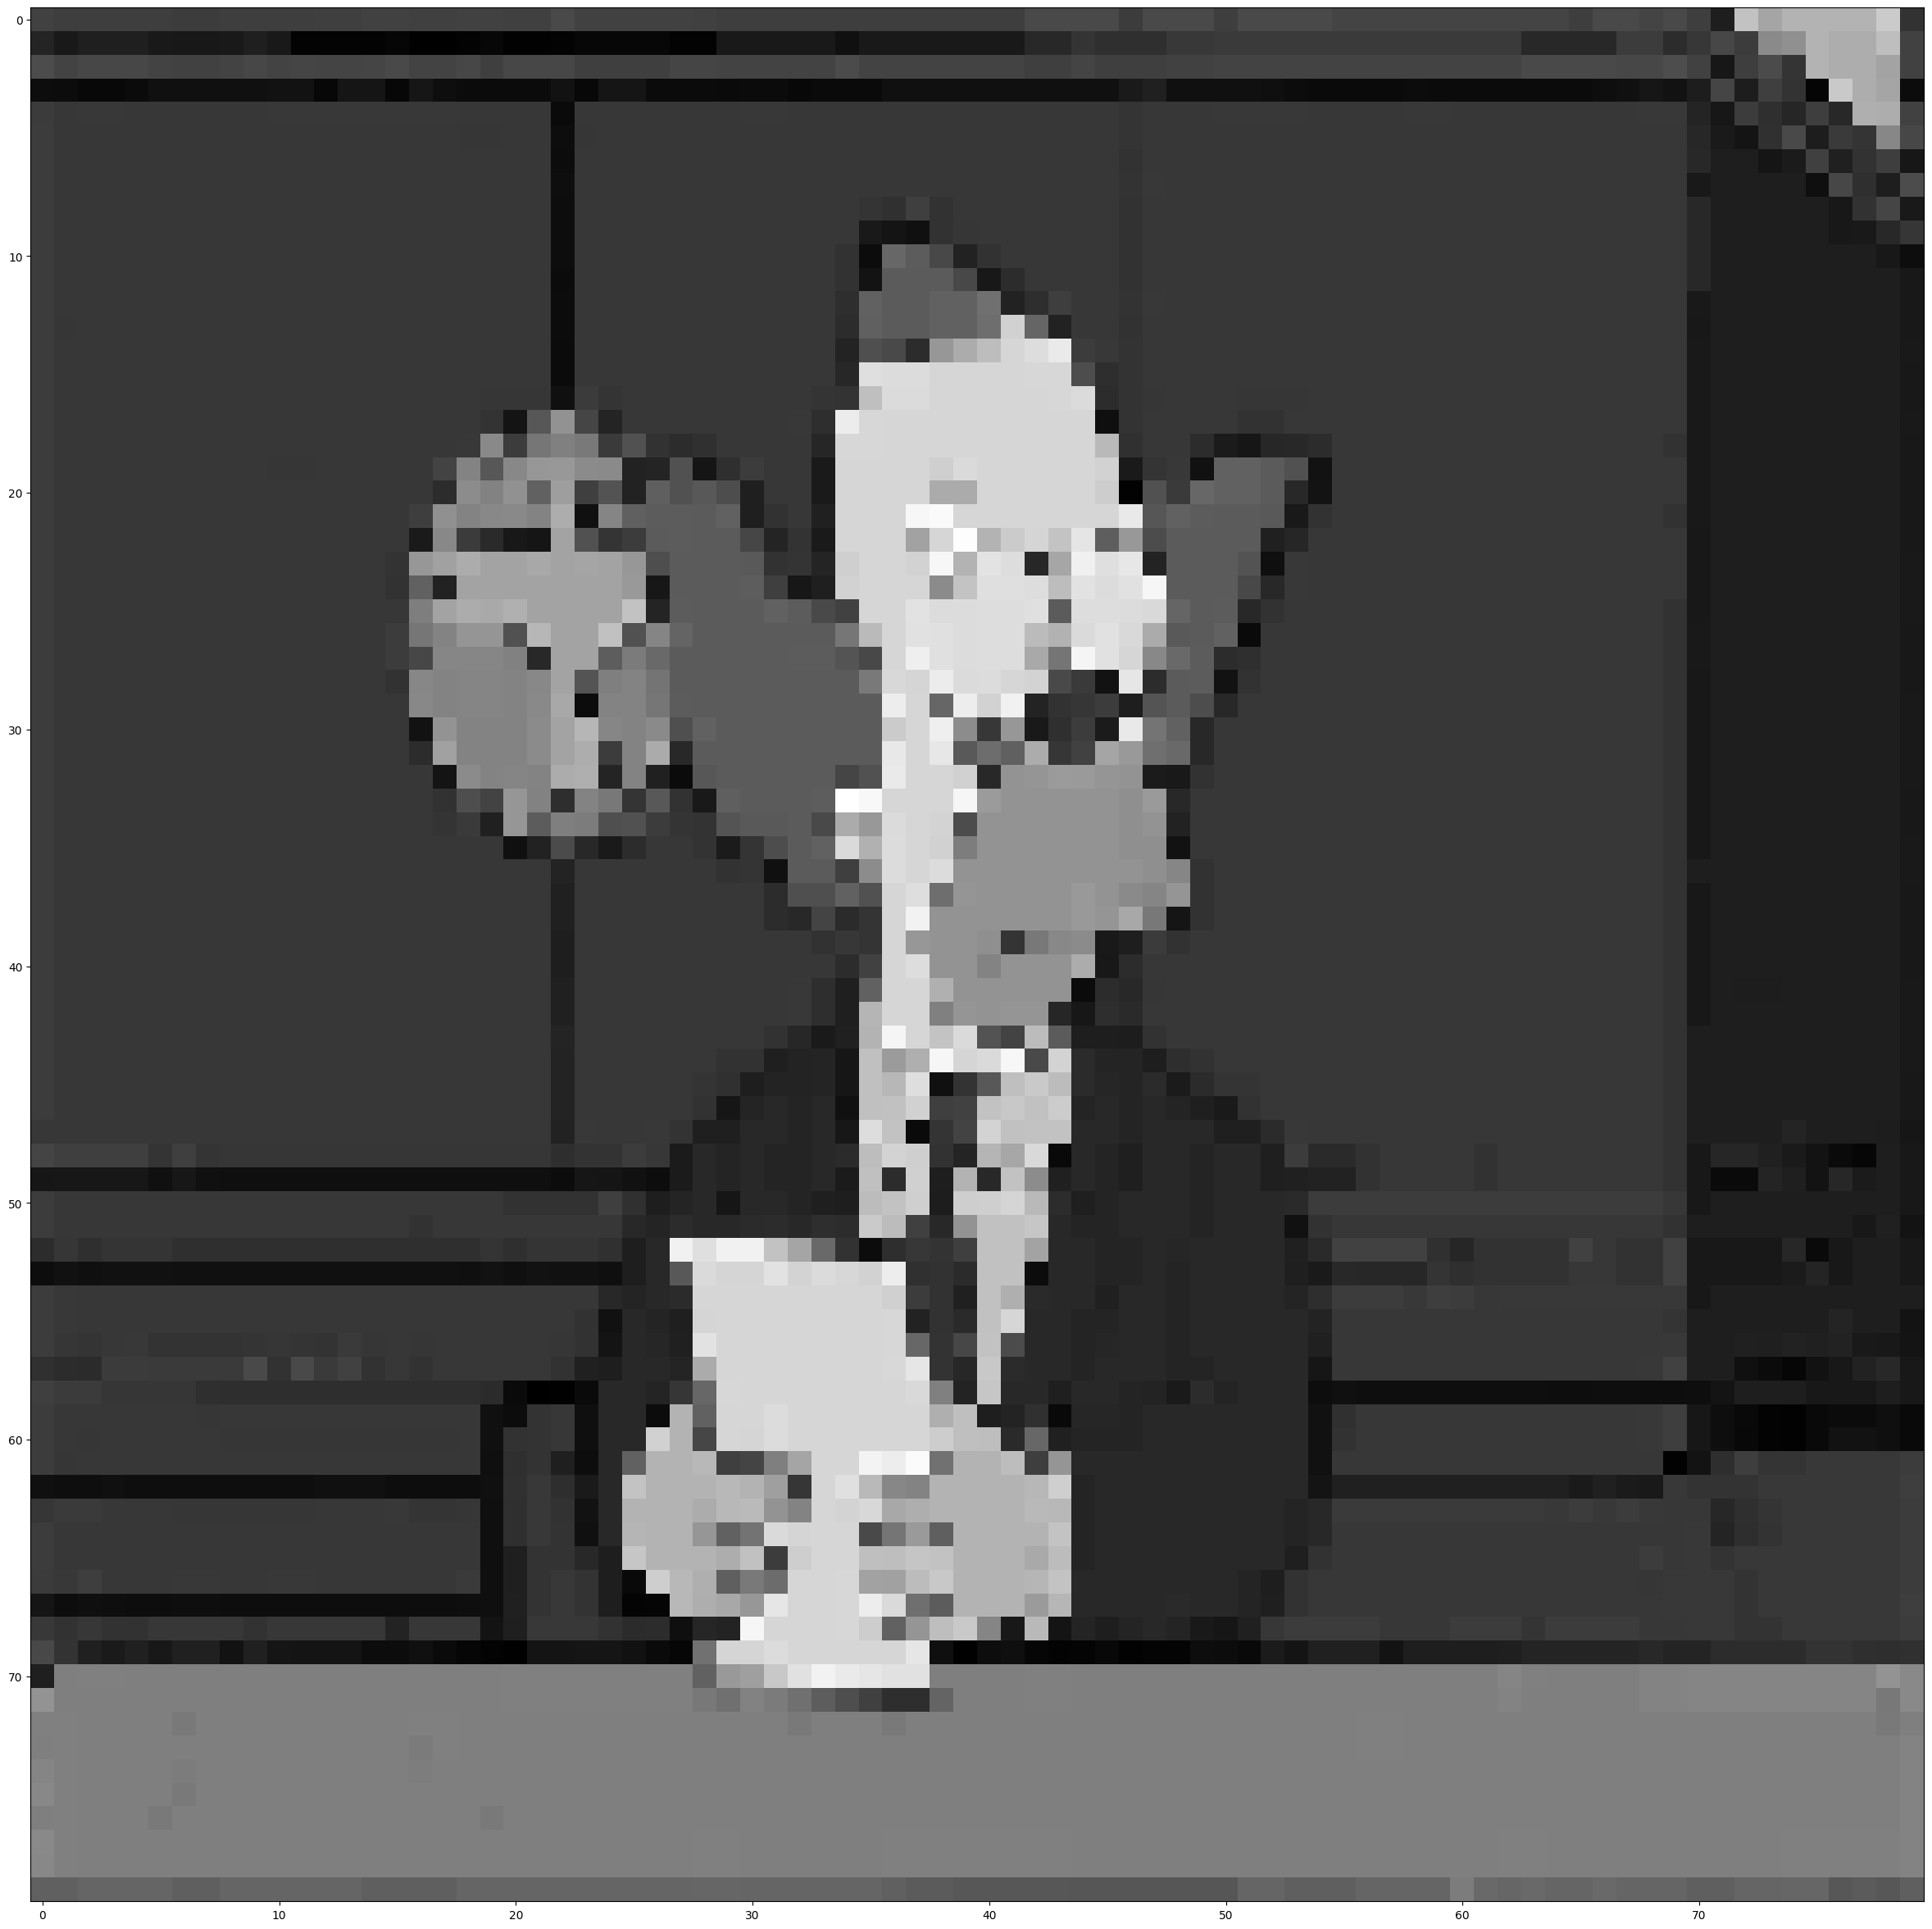

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap = 'gray')
plt.show()

In [10]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [11]:
from tensorflow.keras.utils import to_categorical
# Normalize the featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)

# Conversion of labels from numerical integers to binary class vectors
labels = to_categorical(labels, len(characters))

In [12]:
x_train,x_val,y_train,y_val = caer.train_val_split(featureSet, labels, val_ratio=.2) #20% data goes to validation data

In [13]:
# del train
# del featureSet
# del labels
# gc.collect()

0

In [14]:
BATCH_SIZE = 32
EPOCHS = 10

In [15]:
# Image data generator
# Used to synthesize new images to introduce some randomness for better training
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)



In [16]:
# ISSUE FIX
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

# 🔧 Patch the broken function
def patched_createSimpsonsModel(IMG_SIZE, channels, output_dim, loss, decay, learning_rate, momentum, nesterov):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                 input_shape=(IMG_SIZE[0], IMG_SIZE[1], channels)))

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))

    # ✅ Use correct params for modern Keras
    optimizer = SGD(
        learning_rate=learning_rate,
        weight_decay=decay,
        momentum=momentum,
        nesterov=nesterov
    )

    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

# Replace canaro's broken function
canaro.models.createSimpsonsModel = patched_createSimpsonsModel


In [17]:
# Creating the model

model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters), loss='binary_crossentropy', decay = 1e-6, learning_rate=0.001, momentum=0.9, nesterov=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1749806643.554450      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 80, 80, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 80, 80, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 40, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 40, 40, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      13,107,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,177,834 (50.27 MB)

 Trainable params: 13,177,834 (50.27 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [20]:
training = model.fit(train_gen,
                    steps_per_epoch = len(x_train)//BATCH_SIZE,
                    epochs = EPOCHS,
                    validation_data = (x_val, y_val),
                    validation_steps = len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1749806646.713913     106 service.cc:148] XLA service 0x79222c00b930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749806646.714913     106 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749806646.980373     106 cuda_dnn.cc:529] Loaded cuDNN version 90300


 10/345 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.0663 - loss: 0.6895

I0000 00:00:1749806649.500475     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


345/345 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.1427 - loss: 0.3862 - val_accuracy: 0.1632 - val_loss: 0.3234 - learning_rate: 0.0100
Epoch 2/10
  1/345 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1562 - loss: 0.3225

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.1562 - loss: 0.3225 - val_accuracy: 0.1632 - val_loss: 0.3237 - learning_rate: 0.0100
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.1582 - loss: 0.3228 - val_accuracy: 0.1892 - val_loss: 0.3154 - learning_rate: 0.0100
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.1562 - loss: 0.3275 - val_accuracy: 0.1932 - val_loss: 0.3154 - learning_rate: 0.0100
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.2257 - loss: 0.3086 - val_accuracy: 0.2558 - val_loss: 0.2998 - learning_rate: 0.0100
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.2500 - loss: 0.2949 - val_accuracy: 0.2496 - val_loss: 0.2998 - learning_rate: 0.0100
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.2610 - loss: 0.3008 - val_accuracy: 0.2967 - val_loss: 0.2892 - learning_rate: 0.0100
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.3125 - loss: 0.2809 - 

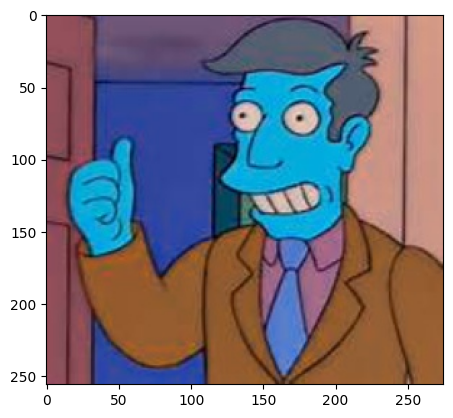

In [34]:
test_path = r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/principal_skinner/pic_0004.jpg'
img = cv.imread(test_path)
plt.imshow(img)
plt.show()

In [23]:
def prepare(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, IMG_SIZE)
    img = caer.reshape(img, IMG_SIZE, 1)
    return img

In [40]:
predictions = model.predict(prepare(img))
print(predictions)
print(characters[np.argmax(predictions[0])], np.argmax(predictions[0]) )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.0000000e+00 0.0000000e+00 1.3321852e-35 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 3.2879177e-37 0.0000000e+00]]
lisa_simpson 3
